In [1]:
import xscen as xs
import xarray as xr
from xscen.config import CONFIG
import figanos.matplotlib as fg
fg.utils.set_mpl_style('ouranos')

# Load configuration
xs.load_config(
    "paths_obs.yml", "config_obs.yml", verbose=(__name__ == "__main__"), reset=True
)
pcat = xs.ProjectCatalog(CONFIG["paths"]["project_catalog"])
pcat.df

/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


id            type processing_level  \
0   ECMWF_ERA5-Land_NAM_reconstruction  reconstruction        extracted   
1       GovCan_RDRS_NAM_reconstruction  reconstruction        extracted   
2         GovCan_AHCCD_CAN_station-tas     station-tas        extracted   
3          GovCan_AHCCD_CAN_station-pr      station-pr        extracted   
4   ECMWF_ERA5-Land_NAM_reconstruction  reconstruction       indicators   
5   ECMWF_ERA5-Land_NAM_reconstruction  reconstruction       indicators   
6          GovCan_AHCCD_CAN_station-pr      station-pr       indicators   
7          GovCan_AHCCD_CAN_station-pr      station-pr       indicators   
8         GovCan_AHCCD_CAN_station-tas     station-tas       indicators   
9         GovCan_AHCCD_CAN_station-tas     station-tas       indicators   
10      GovCan_RDRS_NAM_reconstruction  reconstruction       indicators   
11      GovCan_RDRS_NAM_reconstruction  reconstruction       indicators   
12  ECMWF_ERA5-Land_NAM_reconstruction  reconstruction      climatology   
13  ECMWF_ERA5-Land_NAM_reconstruction  reconstruction      climatology   
14         GovCan_AHCCD_CAN_station-pr      station-pr      climatology   
15         GovCan_AHCCD_CAN_station-pr      station-pr      climatology   
16        GovCan_AHCCD_CAN_station-tas     station-tas      climatology   
17        GovCan_AHCCD_CAN_station-tas     station-tas      climatology   
18      GovCan_RDRS_NAM_reconstruction  reconstruction      climatology   
19      GovCan_RDRS_NAM_reconstruction  reconstruction      climatology   

   bias_adjust_institution bias_adjust_project mip_era activity driving_model  \
0                      NaN                 NaN     NaN      NaN           NaN   
1                      NaN                 NaN     NaN      NaN           NaN   
2                      NaN                 NaN     NaN      NaN           NaN   
3                      NaN                 NaN     NaN      NaN           NaN   
4                      NaN                 NaN     NaN      NaN           NaN   
5                      NaN                 NaN     NaN      NaN           NaN   
6                      NaN                 NaN     NaN      NaN           NaN   
7                      NaN                 NaN     NaN      NaN           NaN   
8                      NaN                 NaN     NaN      NaN           NaN   
9                      NaN                 NaN     NaN      NaN           NaN   
10                     NaN                 NaN     NaN      NaN           NaN   
11                     NaN                 NaN     NaN      NaN           NaN   
12                     NaN                 NaN     NaN      NaN           NaN   
13                     NaN                 NaN     NaN      NaN           NaN   
14                     NaN                 NaN     NaN      NaN           NaN   
15                     NaN                 NaN     NaN      NaN           NaN   
16                     NaN                 NaN     NaN      NaN           NaN   
17                     NaN                 NaN     NaN      NaN           NaN   
18                     NaN                 NaN     NaN      NaN           NaN   
19                     NaN                 NaN     NaN      NaN           NaN   

   institution     source  ... member  xrfreq frequency  \
0        ECMWF  ERA5-Land  ...    NaN       D       day   
1       GovCan       RDRS  ...    NaN       D       day   
2       GovCan      AHCCD  ...    NaN       D       day   
3       GovCan      AHCCD  ...    NaN       D       day   
4        ECMWF  ERA5-Land  ...    NaN  YS-JAN        yr   
5        ECMWF  ERA5-Land  ...    NaN  QS-DEC       qtr   
6       GovCan      AHCCD  ...    NaN  YS-JAN        yr   
7       GovCan      AHCCD  ...    NaN  QS-DEC       qtr   
8       GovCan      AHCCD  ...    NaN  YS-JAN        yr   
9       GovCan      AHCCD  ...    NaN  QS-DEC       qtr   
10      GovCan       RDRS  ...    NaN  YS-JAN        yr   
11      GovCan       RDRS  ...    NaN  QS-DEC     


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/plot.py:1748: UserWarning: 28 nan values were dropped when plotting the color values
/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-pac

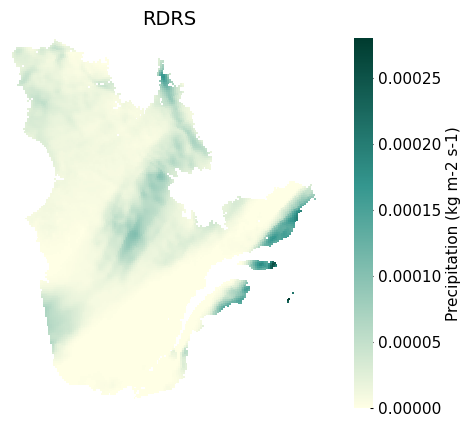

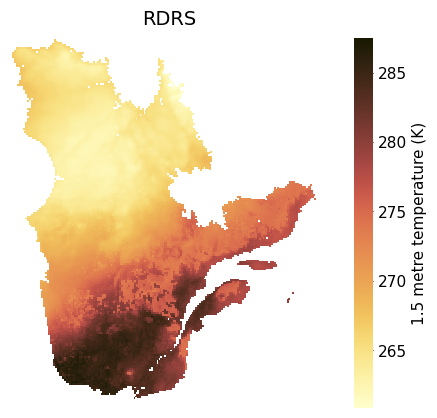

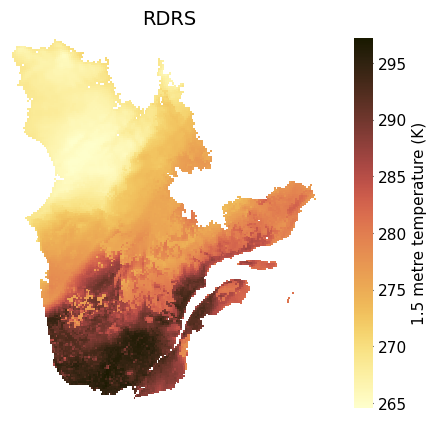

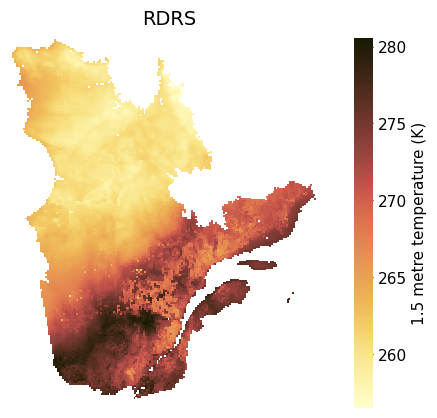

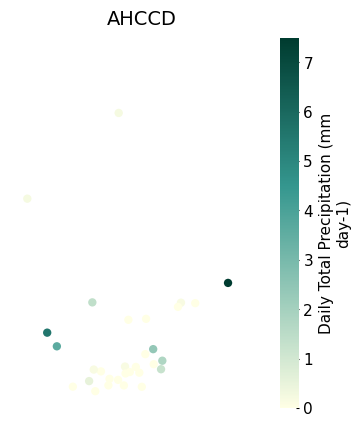

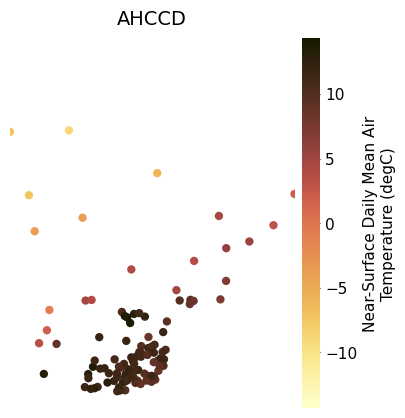

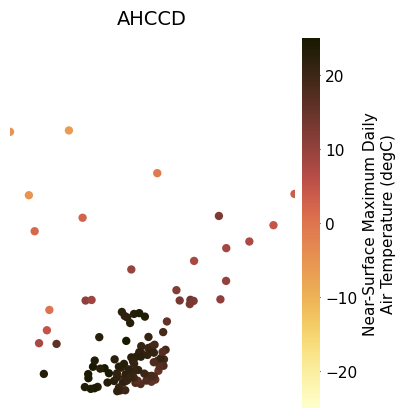

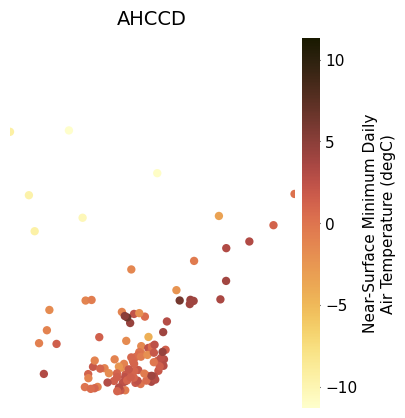

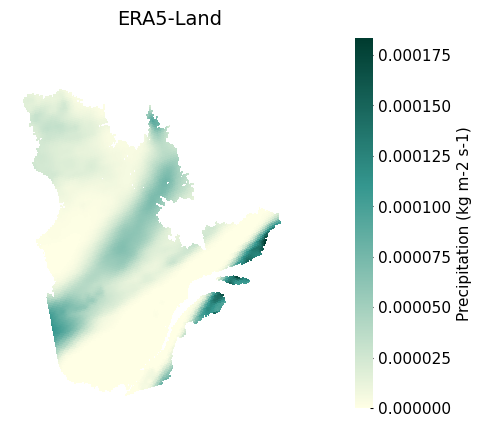

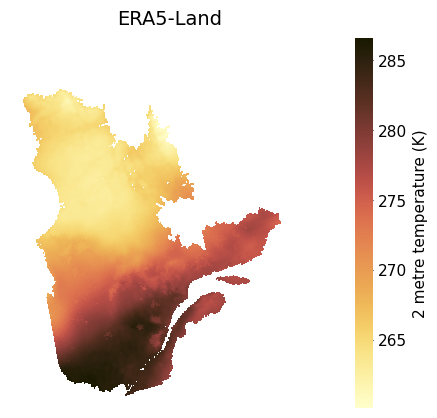

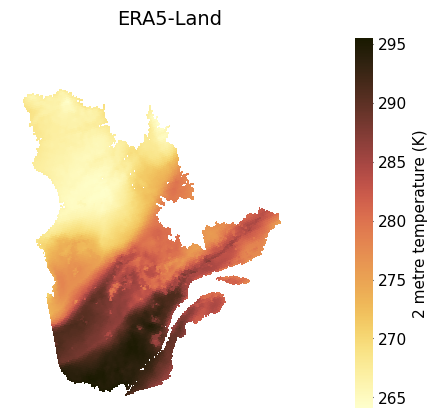

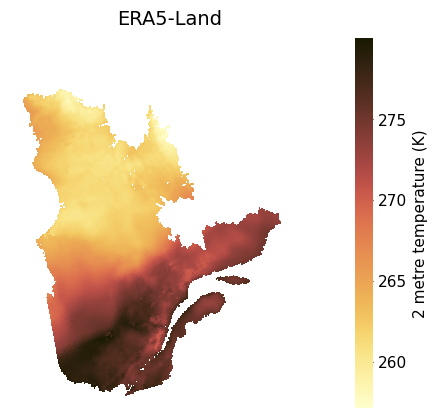

In [2]:
t=10000
dict_ext= pcat.search(processing_level='extracted').to_dataset_dict()
for id, ds in dict_ext.items():
    #ds=ds.set_coords('crs')
    for var in ds.data_vars:
        if ds.attrs['cat:type']=='reconstruction':
            ax=fg.gridmap(ds[var].isel(time=t))
        else:
            #ds=ds.sel(time=slice(str(ds['fromyear'].min().values),None))
            ax=fg.scattermap(ds[var].isel(time=t))
        ax.set_title(ds.attrs['cat:source'])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


<xarray.Dataset> Size: 80MB
Dimensions:           (lat: 176, lon: 226, time: 168)
Coordinates:
    crs               int64 8B ...
  * lat               (lat) float32 704B 45.0 45.1 45.2 45.3 ... 62.3 62.4 62.5
  * lon               (lon) float32 904B -79.5 -79.4 -79.3 ... -57.2 -57.1 -57.0
  * time              (time) datetime64[ns] 1kB 1980-03-01 ... 2021-12-01
Data variables:
    pr_mean_seasonal  (time, lat, lon) float64 53MB dask.array<chunksize=(168, 30, 30), meta=np.ndarray>
    tg_mean_seasonal  (time, lat, lon) float32 27MB dask.array<chunksize=(168, 30, 30), meta=np.ndarray>
Attributes: (12/43)
    Conventions:             CF-1.9
    abstract:                ERA5-Land provides hourly high resolution inform...
    attribution:             Contains modified Copernicus Climate Change Serv...
    citation:                Muñoz Sabater, J., (2021): ERA5-Land hourly data...
    crs:                     EPSG:4326
    data_specs_version:      00.00.07
    ...                      ...
    cat:variable:            tg_mean_seasonal,pr_mean_seasonal
    cat:domain:              Quebec
    cat:date_start:          1980-03-01 00:00:00
    cat:date_end:            2021-12-01 00:00:00
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/indicators/ECMWF...

<xarray.Dataset> Size: 20MB
Dimensions:         (lat: 176, lon: 226, time: 42)
Coordinates:
    crs             int64 8B ...
  * lat             (lat) float32 704B 45.0 45.1 45.2 45.3 ... 62.3 62.4 62.5
  * lon             (lon) float32 904B -79.5 -79.4 -79.3 ... -57.2 -57.1 -57.0
  * time            (time) datetime64[ns] 336B 1980-01-01 ... 2021-01-01
Data variables:
    pr_mean_annual  (time, lat, lon) float64 13MB dask.array<chunksize=(42, 30, 30), meta=np.ndarray>
    tg_mean_annual  (time, lat, lon) float32 7MB dask.array<chunksize=(42, 30, 30), meta=np.ndarray>
Attributes: (12/43)
    Conventions:             CF-1.9
    abstract:                ERA5-Land provides hourly high resolution inform...
    attribution:             Contains modified Copernicus Climate Change Serv...
    citation:                Muñoz Sabater, J., (2021): ERA5-Land hourly data...
    crs:                     EPSG:4326
    data_specs_version:      00.00.07
    ...                      ...
    cat:variable:            tg_mean_annual,pr_mean_annual
    cat:domain:              Quebec
    cat:date_start:          1980-01-01 00:00:00
    cat:date_end:            2021-01-01 00:00:00
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/indicators/ECMWF...

<xarray.Dataset> Size: 15MB
Dimensions:         (rlat: 189, rlon: 162, time: 39)
Coordinates:
    crs             int64 8B ...
    lat             (rlat, rlon) float32 122kB dask.array<chunksize=(189, 162), meta=np.ndarray>
    lon             (rlat, rlon) float32 122kB dask.array<chunksize=(189, 162), meta=np.ndarray>
  * rlat            (rlat) float32 756B -11.52 -11.43 -11.34 ... 5.22 5.31 5.4
  * rlon            (rlon) float32 648B 366.6 366.7 366.8 ... 380.9 381.0 381.1
    rotated_pole    float32 4B ...
  * time            (time) datetime64[ns] 312B 1980-01-01 ... 2018-01-01
Data variables:
    pr_mean_annual  (time, rlat, rlon) float64 10MB dask.array<chunksize=(39, 30, 30), meta=np.ndarray>
    tg_mean_annual  (time, rlat, rlon) float32 5MB dask.array<chunksize=(39, 30, 30), meta=np.ndarray>
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    crs:                     EPSG:4326
    data_specs_version:      00.00.08
    doi:                     https://doi.org/10.5194/hess-25-4917-2021
    frequency:               day
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-01-01 00:00:00
    cat:date_end:            2018-01-01 00:00:00
    cat:version:             v21
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/indicators/GovCa...

<xarray.Dataset> Size: 58MB
Dimensions:           (rlat: 189, rlon: 162, time: 156)
Coordinates:
    crs               int64 8B ...
    lat               (rlat, rlon) float32 122kB dask.array<chunksize=(189, 162), meta=np.ndarray>
    lon               (rlat, rlon) float32 122kB dask.array<chunksize=(189, 162), meta=np.ndarray>
  * rlat              (rlat) float32 756B -11.52 -11.43 -11.34 ... 5.22 5.31 5.4
  * rlon              (rlon) float32 648B 366.6 366.7 366.8 ... 381.0 381.1
    rotated_pole      float32 4B ...
  * time              (time) datetime64[ns] 1kB 1980-03-01 ... 2018-12-01
Data variables:
    pr_mean_seasonal  (time, rlat, rlon) float64 38MB dask.array<chunksize=(156, 30, 30), meta=np.ndarray>
    tg_mean_seasonal  (time, rlat, rlon) float32 19MB dask.array<chunksize=(156, 30, 30), meta=np.ndarray>
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    crs:                     EPSG:4326
    data_specs_version:      00.00.08
    doi:                     https://doi.org/10.5194/hess-25-4917-2021
    frequency:               day
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-03-01 00:00:00
    cat:date_end:            2018-12-01 00:00:00
    cat:version:             v21
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/indicators/GovCa...

<xarray.Dataset> Size: 77kB
Dimensions:           (station: 59, time: 152)
Coordinates: (12/14)
    crs               int64 8B ...
    elev              (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    frommonth         (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    fromyear          (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    lat               (station) float64 472B dask.array<chunksize=(59,), meta=np.ndarray>
    lon               (station) float64 472B dask.array<chunksize=(59,), meta=np.ndarray>
    ...                ...
    station_name      (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
    stnid             (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
    stns_joined       (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
  * time              (time) datetime64[ns] 1kB 1980-03-01 ... 2017-12-01
    tomonth           (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    toyear            (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
Data variables:
    pr_mean_seasonal  (station, time) float64 72kB dask.array<chunksize=(50, 152), meta=np.ndarray>
Attributes: (12/27)
    citation:                Mekis, É and L.A. Vincent, 2011: An overview of ...
    crs:                     EPSG:4326
    dataset_id:              AHCCD_gen2_day_precipitation
    frequency:               day
    history:                 [2025-03-31 14:17:52] shape spatial subsetting w...
    institute:               Environment and Climate Change Canada
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-03-01 00:00:00
    cat:date_end:            2017-12-01 00:00:00
    cat:version:             gen2
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/indicators/GovCa...

/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/plot.py:1748: UserWarning: 2 nan values were dropped when plotting the color values


<xarray.Dataset> Size: 197kB
Dimensions:           (station: 136, time: 168)
Coordinates: (12/17)
    crs               int64 8B ...
    elev              (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    frommonth         (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    fromyear          (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    joined            (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    lat               (station) float64 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    ...                ...
  * station           (station) object 1kB '7011983' '7014160' ... '7117823'
    station_name      (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    stnid             (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
  * time              (time) datetime64[ns] 1kB 1980-03-01 ... 2021-12-01
    tomonth           (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    toyear            (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
Data variables:
    tg_mean_seasonal  (station, time) float64 183kB dask.array<chunksize=(50, 168), meta=np.ndarray>
Attributes: (12/27)
    citation:                Vincent, L.A., M.M. Hartwell and X.L. Wang, 2020...
    crs:                     EPSG:4326
    dataset_id:              AHCCD_gen3_day_temperature
    frequency:               day
    history:                 [2025-03-31 14:17:03] shape spatial subsetting w...
    institute:               Environment and Climate Change Canada
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-03-01 00:00:00
    cat:date_end:            2021-12-01 00:00:00
    cat:version:             gen3
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/indicators/GovCa...

/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/plot.py:1748: UserWarning: 12 nan values were dropped when plotting the color values


<xarray.Dataset> Size: 23kB
Dimensions:         (station: 59, time: 38)
Coordinates: (12/14)
    crs             int64 8B ...
    elev            (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    frommonth       (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    fromyear        (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    lat             (station) float64 472B dask.array<chunksize=(59,), meta=np.ndarray>
    lon             (station) float64 472B dask.array<chunksize=(59,), meta=np.ndarray>
    ...              ...
    station_name    (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
    stnid           (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
    stns_joined     (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
  * time            (time) datetime64[ns] 304B 1980-01-01 ... 2017-01-01
    tomonth         (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    toyear          (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
Data variables:
    pr_mean_annual  (station, time) float64 18kB dask.array<chunksize=(50, 38), meta=np.ndarray>
Attributes: (12/27)
    citation:                Mekis, É and L.A. Vincent, 2011: An overview of ...
    crs:                     EPSG:4326
    dataset_id:              AHCCD_gen2_day_precipitation
    frequency:               day
    history:                 [2025-03-31 14:17:52] shape spatial subsetting w...
    institute:               Environment and Climate Change Canada
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-01-01 00:00:00
    cat:date_end:            2017-01-01 00:00:00
    cat:version:             gen2
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/indicators/GovCa...

/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/plot.py:1748: UserWarning: 1 nan values were dropped when plotting the color values


<xarray.Dataset> Size: 59kB
Dimensions:         (station: 136, time: 42)
Coordinates: (12/17)
    crs             int64 8B ...
    elev            (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    frommonth       (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    fromyear        (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    joined          (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    lat             (station) float64 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    ...              ...
  * station         (station) object 1kB '7011983' '7014160' ... '7117823'
    station_name    (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    stnid           (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
  * time            (time) datetime64[ns] 336B 1980-01-01 ... 2021-01-01
    tomonth         (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    toyear          (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
Data variables:
    tg_mean_annual  (station, time) float64 46kB dask.array<chunksize=(50, 42), meta=np.ndarray>
Attributes: (12/27)
    citation:                Vincent, L.A., M.M. Hartwell and X.L. Wang, 2020...
    crs:                     EPSG:4326
    dataset_id:              AHCCD_gen3_day_temperature
    frequency:               day
    history:                 [2025-03-31 14:17:03] shape spatial subsetting w...
    institute:               Environment and Climate Change Canada
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-01-01 00:00:00
    cat:date_end:            2021-01-01 00:00:00
    cat:version:             gen3
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/indicators/GovCa...

/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/plot.py:1748: UserWarning: 14 nan values were dropped when plotting the color values


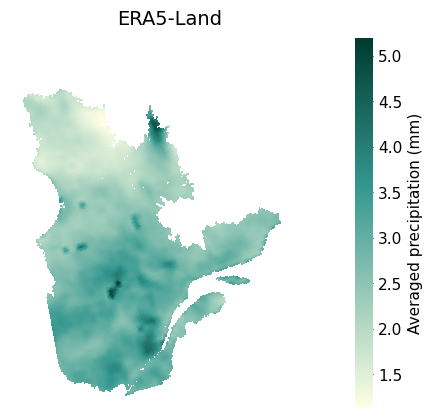

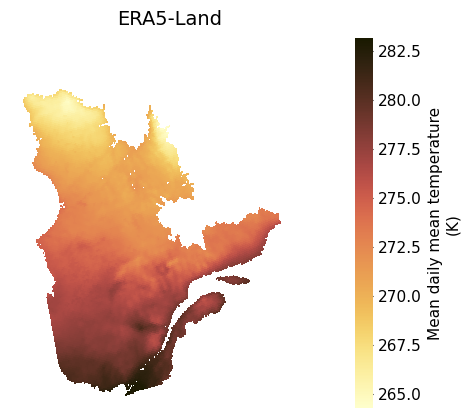

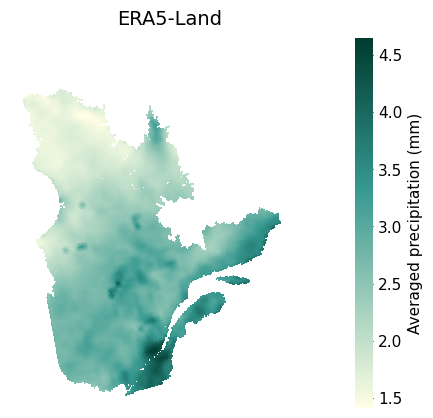

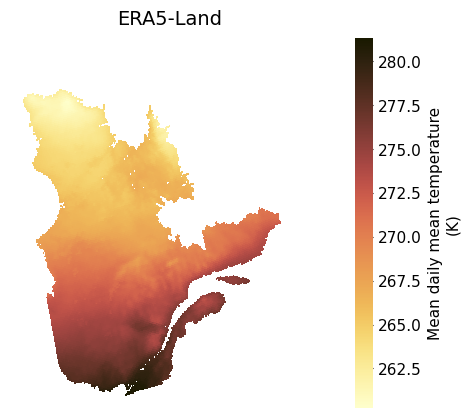

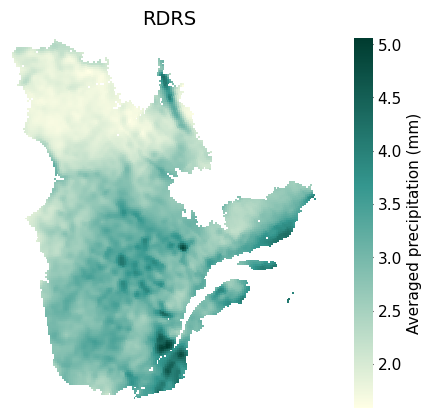

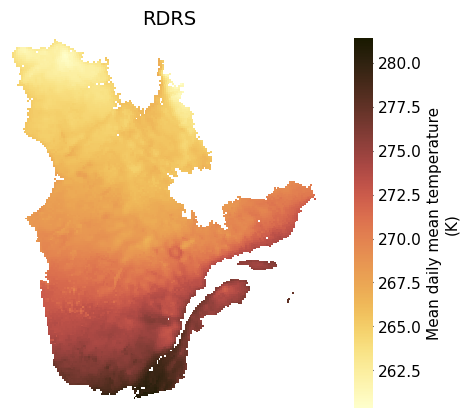

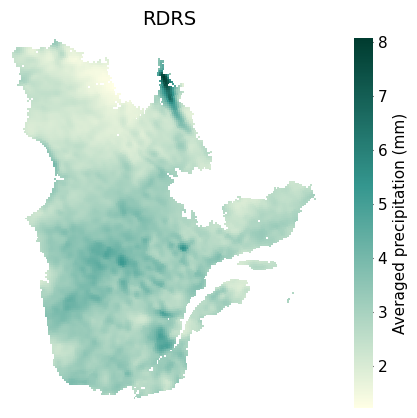

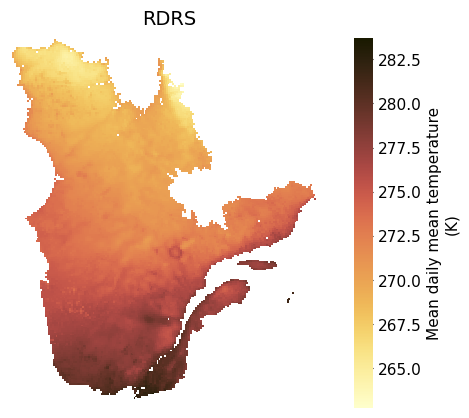

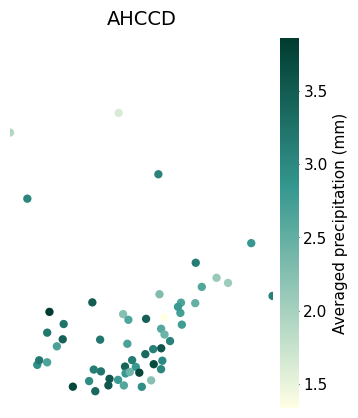

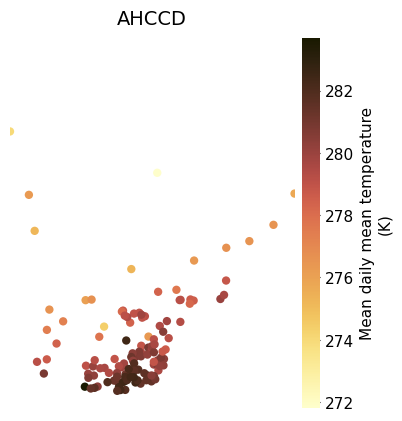

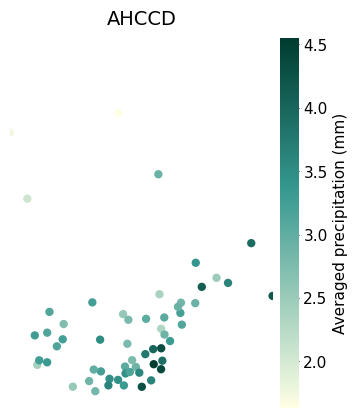

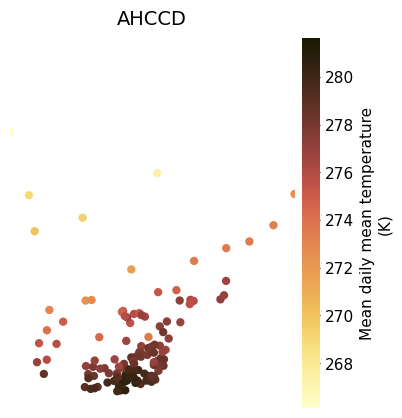

In [3]:
t=10
dict_ext= pcat.search(processing_level='indicators').to_dataset_dict()
for id, ds in dict_ext.items():
    display(ds)
    for var in ds.data_vars:
        if ds.attrs['cat:type']=='reconstruction':
            ax=fg.gridmap(ds[var].isel(time=t))
        else:
            #ds=ds.sel(time=slice(str(ds['fromyear'].min().values),None))
            ax=fg.scattermap(ds[var].isel(time=t))
        ax.set_title(ds.attrs['cat:source'])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


<xarray.Dataset> Size: 956kB
Dimensions:                   (horizon: 1, lat: 176, lon: 226)
Coordinates:
    crs                       int64 8B ...
  * horizon                   (horizon) <U9 36B '1988-2017'
  * lat                       (lat) float32 704B 45.0 45.1 45.2 ... 62.4 62.5
  * lon                       (lon) float32 904B -79.5 -79.4 ... -57.1 -57.0
Data variables:
    pr_mean_annual_clim_mean  (horizon, lat, lon) float64 318kB dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    pr_mean_annual_clim_std   (horizon, lat, lon) float64 318kB dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    tg_mean_annual_clim_mean  (horizon, lat, lon) float32 159kB dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    tg_mean_annual_clim_std   (horizon, lat, lon) float32 159kB dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
Attributes: (12/43)
    Conventions:             CF-1.9
    abstract:                ERA5-Land provides hourly high resolution inform...
    attribution:             Contains modified Copernicus Climate Change Serv...
    citation:                Muñoz Sabater, J., (2021): ERA5-Land hourly data...
    crs:                     EPSG:4326
    data_specs_version:      00.00.07
    ...                      ...
    cat:variable:            pr_mean_annual_clim_std,tg_mean_annual_clim_mean...
    cat:domain:              Quebec
    cat:date_start:          1980-01-01 00:00:00
    cat:date_end:            2021-01-01 00:00:00
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/climatology/ECMW...

<xarray.Dataset> Size: 981kB
Dimensions:                   (horizon: 1, rlat: 189, rlon: 162)
Coordinates:
    crs                       int64 8B ...
  * horizon                   (horizon) <U9 36B '1988-2017'
    lat                       (rlat, rlon) float32 122kB dask.array<chunksize=(189, 162), meta=np.ndarray>
    lon                       (rlat, rlon) float32 122kB dask.array<chunksize=(189, 162), meta=np.ndarray>
  * rlat                      (rlat) float32 756B -11.52 -11.43 ... 5.31 5.4
  * rlon                      (rlon) float32 648B 366.6 366.7 ... 381.0 381.1
    rotated_pole              float32 4B ...
Data variables:
    pr_mean_annual_clim_mean  (horizon, rlat, rlon) float64 245kB dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    pr_mean_annual_clim_std   (horizon, rlat, rlon) float64 245kB dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    tg_mean_annual_clim_mean  (horizon, rlat, rlon) float32 122kB dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
    tg_mean_annual_clim_std   (horizon, rlat, rlon) float32 122kB dask.array<chunksize=(1, 30, 30), meta=np.ndarray>
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    crs:                     EPSG:4326
    data_specs_version:      00.00.08
    doi:                     https://doi.org/10.5194/hess-25-4917-2021
    frequency:               day
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-01-01 00:00:00
    cat:date_end:            2018-01-01 00:00:00
    cat:version:             v21
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/climatology/GovC...

<xarray.Dataset> Size: 3MB
Dimensions:                     (horizon: 1, rlat: 189, rlon: 162, season: 4)
Coordinates:
    crs                         int64 8B ...
  * horizon                     (horizon) <U9 36B '1988-2017'
    lat                         (rlat, rlon) float32 122kB dask.array<chunksize=(189, 162), meta=np.ndarray>
    lon                         (rlat, rlon) float32 122kB dask.array<chunksize=(189, 162), meta=np.ndarray>
  * rlat                        (rlat) float32 756B -11.52 -11.43 ... 5.31 5.4
  * rlon                        (rlon) float32 648B 366.6 366.7 ... 381.0 381.1
    rotated_pole                float32 4B ...
  * season                      (season) <U3 48B 'MAM' 'JJA' 'SON' 'DJF'
Data variables:
    pr_mean_seasonal_clim_mean  (horizon, season, rlat, rlon) float64 980kB dask.array<chunksize=(1, 4, 30, 30), meta=np.ndarray>
    pr_mean_seasonal_clim_std   (horizon, season, rlat, rlon) float64 980kB dask.array<chunksize=(1, 4, 30, 30), meta=np.ndarray>
    tg_mean_seasonal_clim_mean  (horizon, season, rlat, rlon) float32 490kB dask.array<chunksize=(1, 4, 30, 30), meta=np.ndarray>
    tg_mean_seasonal_clim_std   (horizon, season, rlat, rlon) float32 490kB dask.array<chunksize=(1, 4, 30, 30), meta=np.ndarray>
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    crs:                     EPSG:4326
    data_specs_version:      00.00.08
    doi:                     https://doi.org/10.5194/hess-25-4917-2021
    frequency:               day
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-03-01 00:00:00
    cat:date_end:            2018-12-01 00:00:00
    cat:version:             v21
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/climatology/GovC...

<xarray.Dataset> Size: 4MB
Dimensions:                     (horizon: 1, lat: 176, lon: 226, season: 4)
Coordinates:
    crs                         int64 8B ...
  * horizon                     (horizon) <U9 36B '1988-2017'
  * lat                         (lat) float32 704B 45.0 45.1 45.2 ... 62.4 62.5
  * lon                         (lon) float32 904B -79.5 -79.4 ... -57.1 -57.0
  * season                      (season) <U3 48B 'MAM' 'JJA' 'SON' 'DJF'
Data variables:
    pr_mean_seasonal_clim_mean  (horizon, season, lat, lon) float64 1MB dask.array<chunksize=(1, 4, 30, 30), meta=np.ndarray>
    pr_mean_seasonal_clim_std   (horizon, season, lat, lon) float64 1MB dask.array<chunksize=(1, 4, 30, 30), meta=np.ndarray>
    tg_mean_seasonal_clim_mean  (horizon, season, lat, lon) float32 636kB dask.array<chunksize=(1, 4, 30, 30), meta=np.ndarray>
    tg_mean_seasonal_clim_std   (horizon, season, lat, lon) float32 636kB dask.array<chunksize=(1, 4, 30, 30), meta=np.ndarray>
Attributes: (12/43)
    Conventions:             CF-1.9
    abstract:                ERA5-Land provides hourly high resolution inform...
    attribution:             Contains modified Copernicus Climate Change Serv...
    citation:                Muñoz Sabater, J., (2021): ERA5-Land hourly data...
    crs:                     EPSG:4326
    data_specs_version:      00.00.07
    ...                      ...
    cat:variable:            tg_mean_seasonal_clim_std,pr_mean_seasonal_clim_...
    cat:domain:              Quebec
    cat:date_start:          1980-03-01 00:00:00
    cat:date_end:            2021-12-01 00:00:00
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/climatology/ECMW...

<xarray.Dataset> Size: 5kB
Dimensions:                   (station: 59, horizon: 1)
Coordinates: (12/14)
    crs                       int64 8B ...
    elev                      (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    frommonth                 (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    fromyear                  (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
  * horizon                   (horizon) <U9 36B '1988-2017'
    lat                       (station) float64 472B dask.array<chunksize=(59,), meta=np.ndarray>
    ...                        ...
  * station                   (station) object 472B '7043540' ... '7028441'
    station_name              (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
    stnid                     (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
    stns_joined               (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
    tomonth                   (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    toyear                    (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
Data variables:
    pr_mean_annual_clim_mean  (horizon, station) float64 472B dask.array<chunksize=(1, 50), meta=np.ndarray>
    pr_mean_annual_clim_std   (horizon, station) float64 472B dask.array<chunksize=(1, 50), meta=np.ndarray>
Attributes: (12/27)
    citation:                Mekis, É and L.A. Vincent, 2011: An overview of ...
    crs:                     EPSG:4326
    dataset_id:              AHCCD_gen2_day_precipitation
    frequency:               day
    history:                 [2025-03-31 14:17:52] shape spatial subsetting w...
    institute:               Environment and Climate Change Canada
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-01-01 00:00:00
    cat:date_end:            2017-01-01 00:00:00
    cat:version:             gen2
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/climatology/GovC...

<xarray.Dataset> Size: 15kB
Dimensions:                   (station: 136, horizon: 1)
Coordinates: (12/17)
    crs                       int64 8B ...
    elev                      (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    frommonth                 (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    fromyear                  (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
  * horizon                   (horizon) <U9 36B '1988-2017'
    joined                    (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    ...                        ...
    rcs                       (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
  * station                   (station) object 1kB '7011983' ... '7117823'
    station_name              (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    stnid                     (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    tomonth                   (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    toyear                    (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
Data variables:
    tg_mean_annual_clim_mean  (horizon, station) float64 1kB dask.array<chunksize=(1, 50), meta=np.ndarray>
    tg_mean_annual_clim_std   (horizon, station) float64 1kB dask.array<chunksize=(1, 50), meta=np.ndarray>
Attributes: (12/27)
    citation:                Vincent, L.A., M.M. Hartwell and X.L. Wang, 2020...
    crs:                     EPSG:4326
    dataset_id:              AHCCD_gen3_day_temperature
    frequency:               day
    history:                 [2025-03-31 14:17:03] shape spatial subsetting w...
    institute:               Environment and Climate Change Canada
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-01-01 00:00:00
    cat:date_end:            2021-01-01 00:00:00
    cat:version:             gen3
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/climatology/GovC...

<xarray.Dataset> Size: 8kB
Dimensions:                     (station: 59, horizon: 1, season: 4)
Coordinates: (12/15)
    crs                         int64 8B ...
    elev                        (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    frommonth                   (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    fromyear                    (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
  * horizon                     (horizon) <U9 36B '1988-2017'
    lat                         (station) float64 472B dask.array<chunksize=(59,), meta=np.ndarray>
    ...                          ...
  * station                     (station) object 472B '7043540' ... '7028441'
    station_name                (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
    stnid                       (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
    stns_joined                 (station) object 472B dask.array<chunksize=(59,), meta=np.ndarray>
    tomonth                     (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
    toyear                      (station) int32 236B dask.array<chunksize=(59,), meta=np.ndarray>
Data variables:
    pr_mean_seasonal_clim_mean  (horizon, season, station) float64 2kB dask.array<chunksize=(1, 4, 50), meta=np.ndarray>
    pr_mean_seasonal_clim_std   (horizon, season, station) float64 2kB dask.array<chunksize=(1, 4, 50), meta=np.ndarray>
Attributes: (12/27)
    citation:                Mekis, É and L.A. Vincent, 2011: An overview of ...
    crs:                     EPSG:4326
    dataset_id:              AHCCD_gen2_day_precipitation
    frequency:               day
    history:                 [2025-03-31 14:17:52] shape spatial subsetting w...
    institute:               Environment and Climate Change Canada
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-03-01 00:00:00
    cat:date_end:            2017-12-01 00:00:00
    cat:version:             gen2
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/climatology/GovC...

/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/figanos/matplotlib/plot.py:1694: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


<xarray.Dataset> Size: 22kB
Dimensions:                     (station: 136, horizon: 1, season: 4)
Coordinates: (12/18)
    crs                         int64 8B ...
    elev                        (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    frommonth                   (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    fromyear                    (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
  * horizon                     (horizon) <U9 36B '1988-2017'
    joined                      (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    ...                          ...
  * season                      (season) <U3 48B 'MAM' 'JJA' 'SON' 'DJF'
  * station                     (station) object 1kB '7011983' ... '7117823'
    station_name                (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    stnid                       (station) object 1kB dask.array<chunksize=(136,), meta=np.ndarray>
    tomonth                     (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
    toyear                      (station) int32 544B dask.array<chunksize=(136,), meta=np.ndarray>
Data variables:
    tg_mean_seasonal_clim_mean  (horizon, season, station) float64 4kB dask.array<chunksize=(1, 4, 50), meta=np.ndarray>
    tg_mean_seasonal_clim_std   (horizon, season, station) float64 4kB dask.array<chunksize=(1, 4, 50), meta=np.ndarray>
Attributes: (12/27)
    citation:                Vincent, L.A., M.M. Hartwell and X.L. Wang, 2020...
    crs:                     EPSG:4326
    dataset_id:              AHCCD_gen3_day_temperature
    frequency:               day
    history:                 [2025-03-31 14:17:03] shape spatial subsetting w...
    institute:               Environment and Climate Change Canada
    ...                      ...
    cat:domain:              Quebec
    cat:date_start:          1980-03-01 00:00:00
    cat:date_end:            2021-12-01 00:00:00
    cat:version:             gen3
    cat:_data_format_:       zarr
    cat:path:                /jarre/scenario/jlavoie/obsflow/climatology/GovC...

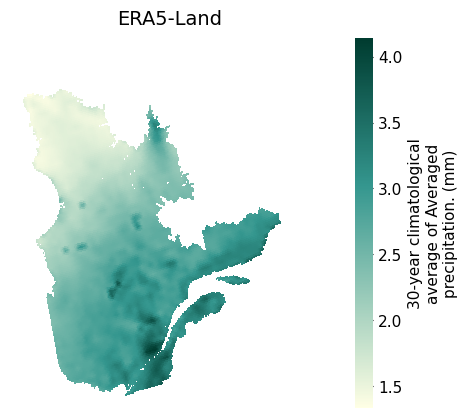

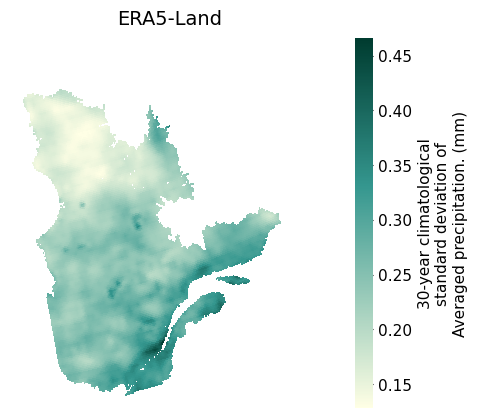

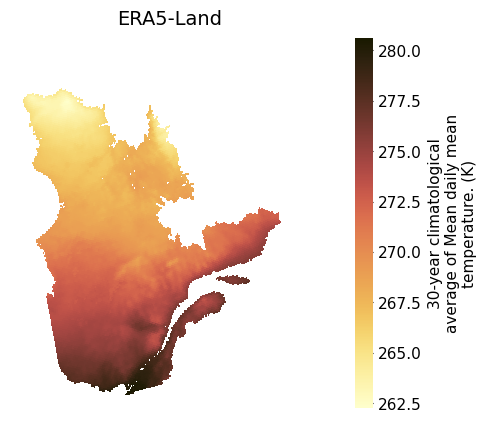

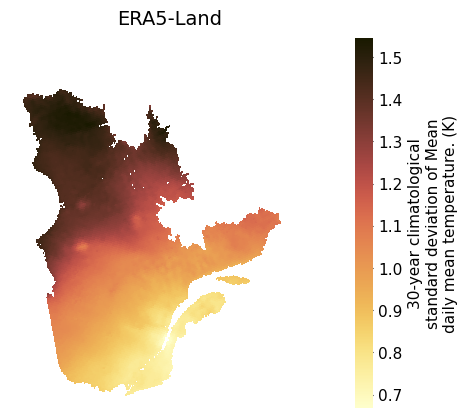

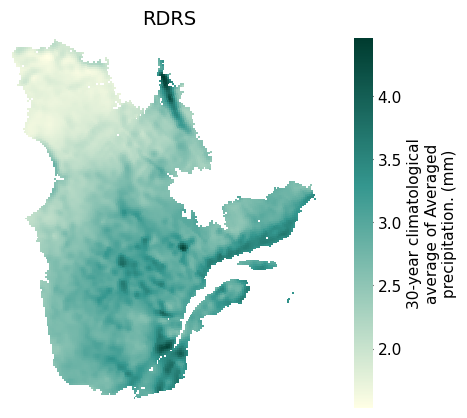

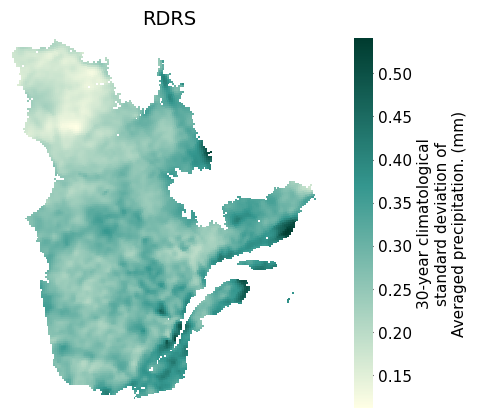

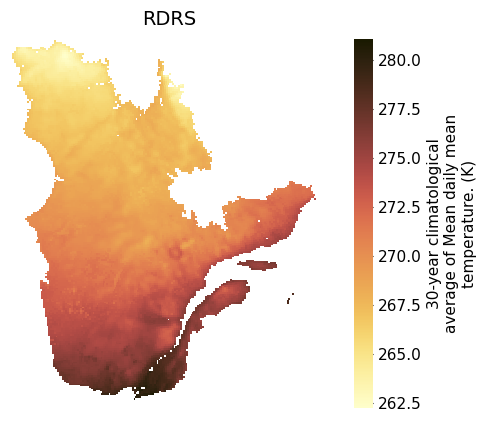

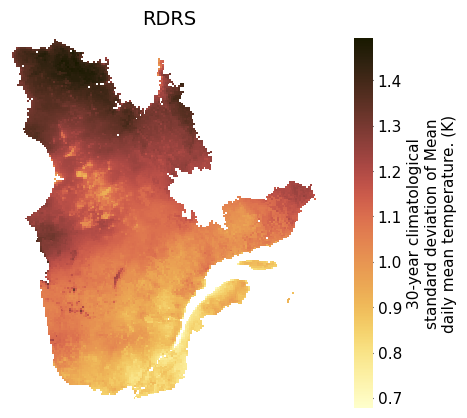

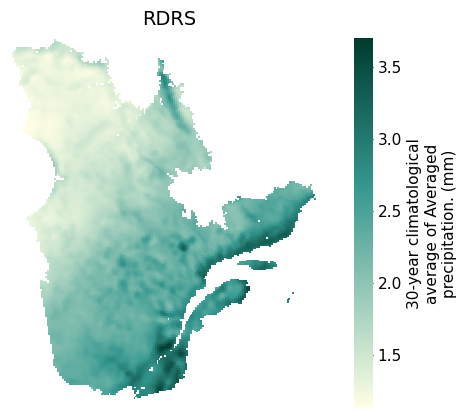

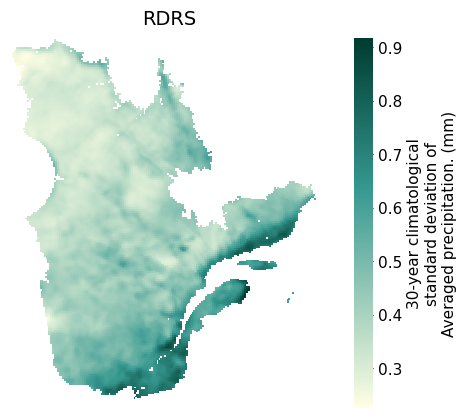

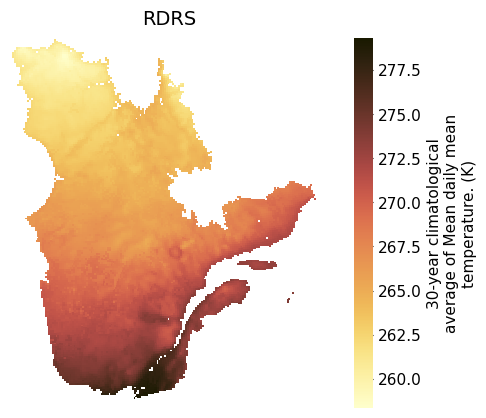

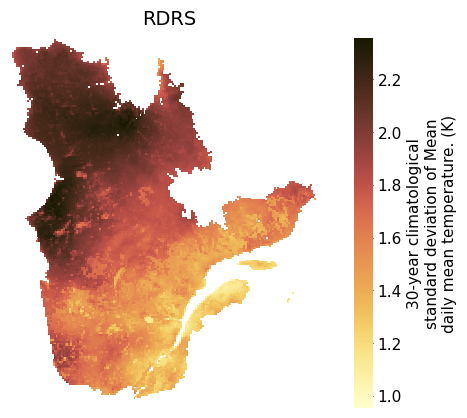

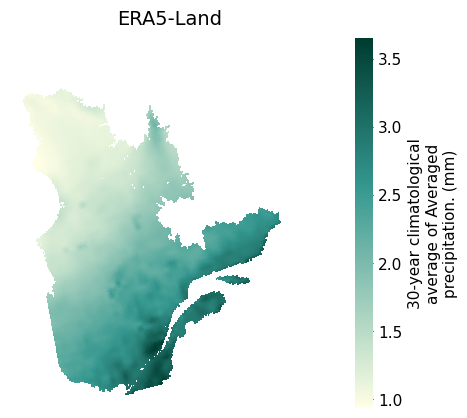

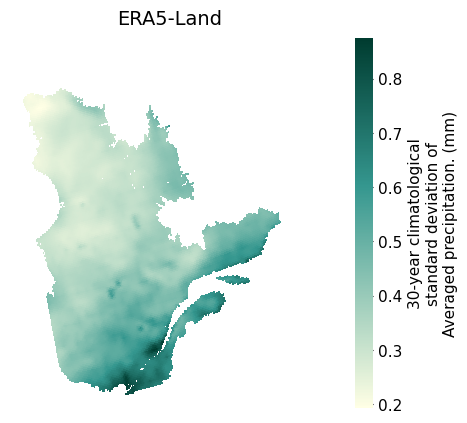

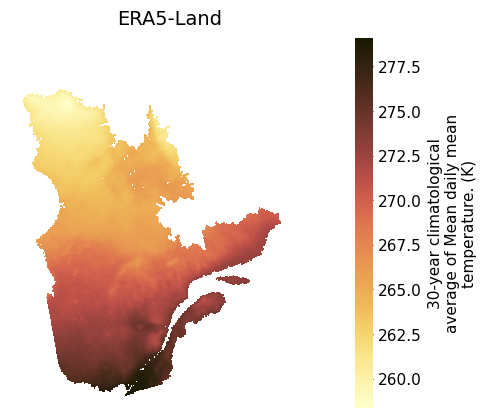

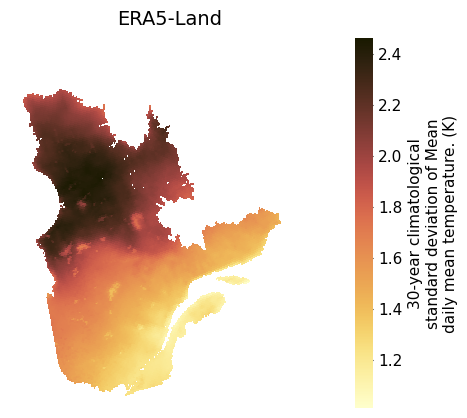

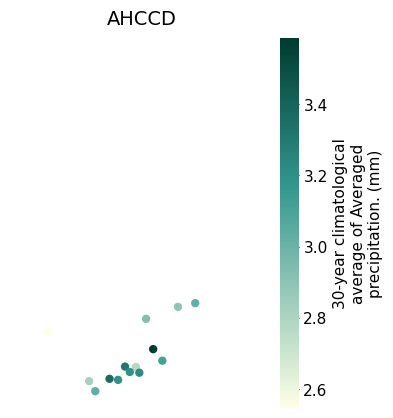

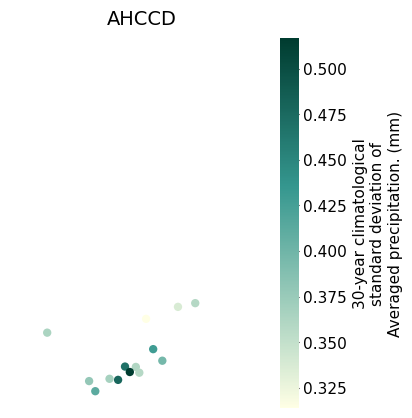

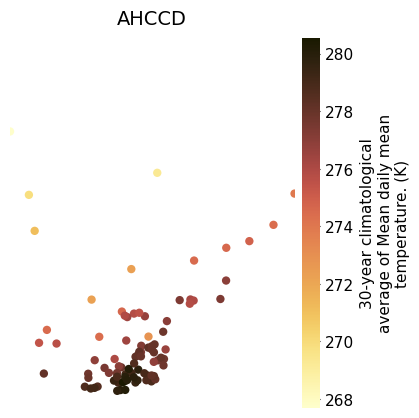

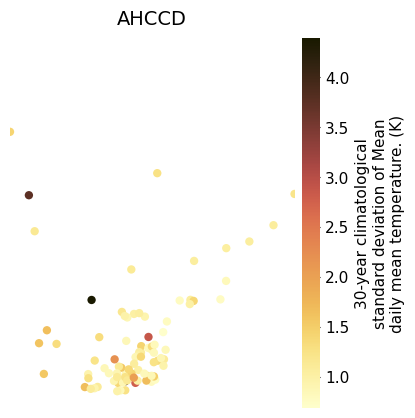

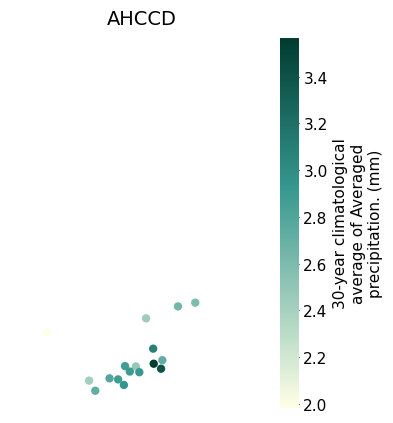

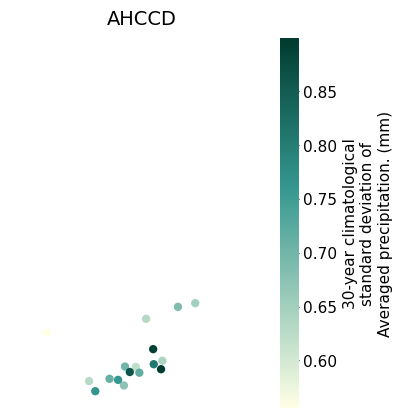

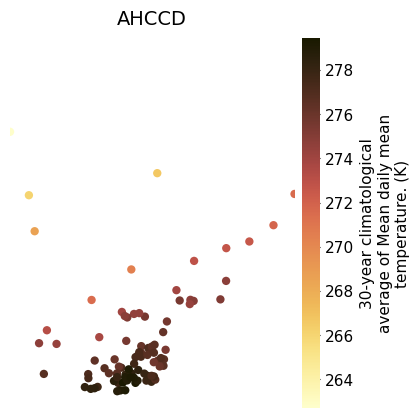

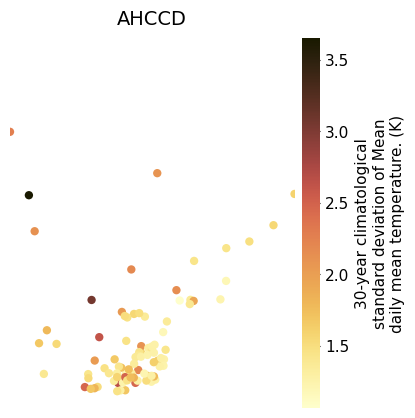

In [4]:

dict_ext= pcat.search(processing_level='climatology').to_dataset_dict()
for id, ds in dict_ext.items():
    display(ds)
    if 'QS-DEC' in id:
        ds=ds.isel(season=0)
    for var in ds.data_vars:
        if ds.attrs['cat:type']=='reconstruction':
            ax=fg.gridmap(ds[var])
        else:
            ax=fg.scattermap(ds[var])
        ax.set_title(ds.attrs['cat:source'])